In [4]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, k, a = symbols( 't k a' )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(k,a):
    return Vector.zero

def P23(k,a):
    return k*N.i

def P13(k,a):
    return k*N.j

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return (k+a)*N.i - a*N.j

def Q13_1(k,a):
    return (k+a)*N.j

def Q13_3(k,a):
    return -a*N.i + (k+a)*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:

def Delta1(k,a):
    return f(P23(k,a), -v1, -v1 + v2 ) * ( f(0*v1 + 0*v2, v1, v1 - v2) + f(a*v1, -v1, -v2) + f(a*v1 - a*v2, v2, -v1 + v2) )

def Delta2(k,a):
    return f(P13(k,a), v1 - v2, -v2 ) * ( f(0*v1 + 0*v2, v2, -v1 + v2) + f(a*v2, -v1, -v2) + f(-a*v1 + a*v2, v1, v1 - v2) )

def Delta3(k,a):
    return f(P12(k,a), v1 , v2 ) * ( f(0*v1 + 0*v2, -v1, -v2) + f(-a*v1, v1, v1 - v2) + f(-a*v2, v2, -v1 + v2) )


def Sum(k,a):
    return Delta1(k,a) + Delta2(k,a) + Delta3(k,a)

# Take the limit as t -> 0 to get the Euler characteristic(?)

def EulerCalculation(k,a):
    return limit(Sum(k,a),t,0)


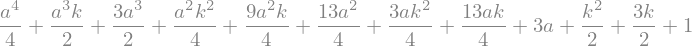

In [5]:
EulerCalculation(k,a) # Letting t -> 0  to obtain the Euler characteristic (n.b. degree-0 term in a is equal to lattice point count for CP2's polytope)

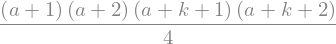

In [6]:
factor(EulerCalculation(k,a))

In [10]:
def Euler(k,a):
    return simplify( Rational(1,4) * ( (a+1)*(a+2)*(a+k+1)*(a+k+2) ) )

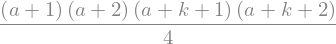

In [11]:
Euler(k,a)

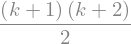

In [16]:
Euler(k,0) # The usual formula for the number of lattice points in the dilated 2-simplex

In [13]:
Euler(0,0) # When the simplex is just a point

In [17]:
Euler(1,0) # When the lattice points are just the three vertices

In [18]:
Euler(2,0)